<a href="https://colab.research.google.com/github/zia207/R_Beginner/blob/main/Notebook/01_04_03_data_visualization_lattice_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# Data Visualization with the `lattice` and `latticeExtra` Packages

The `lattice` package in R is a powerful system for creating Trellis graphics, which allow for multivariate data visualization through conditioning (splitting data into panels) and grouping (overlaying subgroups). It builds on the base R graphics but emphasizes high-level, elegant plots for statistical analysis. The `latticeExtra` package extends `lattice` with additional functions for more flexible and specialized plots, such as empirical CDFs, smoothed surfaces, and layered visualizations.

This tutorial assumes basic familiarity with R and data frames. We'll use built-in datasets like `Chem97` (from `mlmRev`), `quakes`, and `singer` (from `latticeExtra`). By the end, you'll be able to create conditioned scatter plots, box plots, density estimates, and advanced overlays.




## Installation and Setup

Install the packages from CRAN if you haven't already:

```r
install.packages(c("lattice", "latticeExtra"))
```



## Setup R in Python Runtype - Install {rpy2}

{rpy2} is a Python package that provides an interface to the R programming language, allowing Python users to run R code, call R functions, and manipulate R objects directly from Python. It enables seamless integration between Python and R, leveraging R's statistical and graphical capabilities while using Python's flexibility. The package supports passing data between the two languages and is widely used for statistical analysis, data visualization, and machine learning tasks that benefit from R's specialized libraries.

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp312-cp312-linux_x86_64.whl size=316567 sha256=a62c3d2ee1d474ed29ce3a95a67c50074d8d481632d4704c1e3c6f1957261450
  Stored in directory: /root/.cache/pip/wheels/00/26/d5/d5e8c0b039915e785be870270e4a9263e5058168a03513d8cc
Successfully built rpy2


##  Mount Google Drive

Then you must create a folder in Goole drive named "R" to install all packages permanently. Before installing R-package in Python runtime. You have to mount Google Drive and follow on-screen instruction:

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Check and Install Required R Packages

In [5]:
%%R
packages <- c(
          'lattice',
          'latticeExtra',
          'mlmRev'
)

In [6]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
     lattice latticeExtra       mlmRev 
        TRUE         TRUE         TRUE 


## Load Packages

In [7]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))

In [ ]:
%%R
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])

Successfully loaded packages:
 [1] "package:dplyr"     "package:ggplot2"   "package:tools"    
 [4] "package:stats"     "package:graphics"  "package:grDevices"
 [7] "package:utils"     "package:datasets"  "package:methods"  
[10] "package:base"     


## Basic Plots with `lattice`

`lattice` provides high-level functions for common statistical graphics. Let's start with simple examples using the `Chem97` dataset (GCSE and A-level scores for UK students), is part of the {mlmRev} package.


### Scatter Plots with `xyplot()`

The `xyplot()` function creates scatter plots, ideal for two continuous variables.

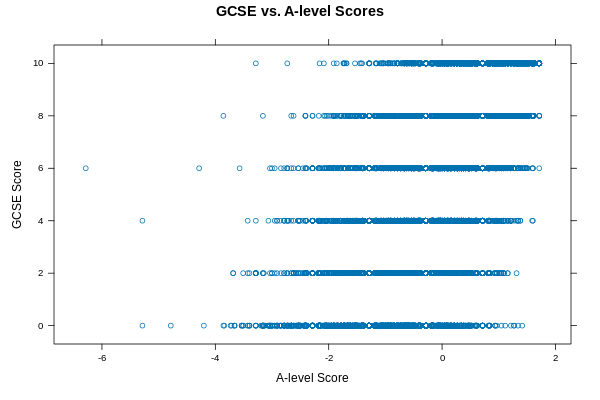

In [8]:
%%R -w 600 -h 400
data(Chem97)

# Basic scatter plot
xyplot(score ~ gcsecnt, data = Chem97,
       main = "GCSE vs. A-level Scores",
       xlab = "A-level Score", ylab = "GCSE Score")

This produces a single panel scatter plot. To add grouping (e.g., by gender), use the `groups` argument:

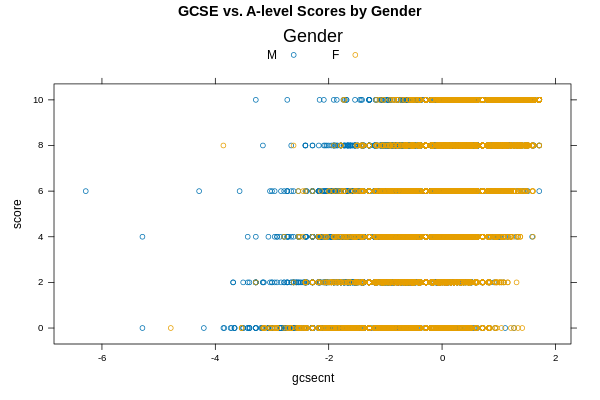

In [9]:
%%R -w 600 -h 400
xyplot(score ~ gcsecnt, data = Chem97,
       groups = gender,
       auto.key = list(title = "Gender", columns = 2),
       main = "GCSE vs. A-level Scores by Gender")

The `auto.key` adds a legend automatically.

### Histograms with `histogram()`
For univariate distributions:

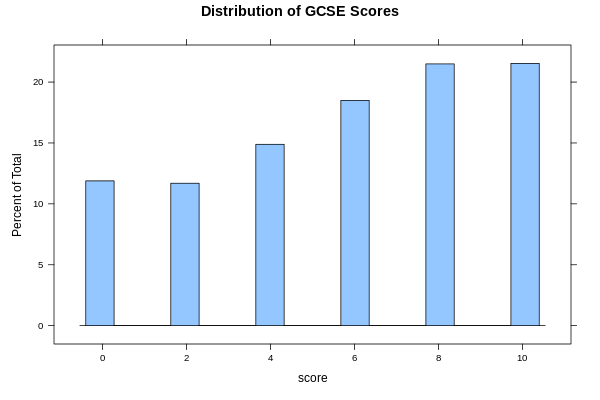

In [10]:
%%R -w 600 -h 400
histogram(~ score, data = Chem97,
          main = "Distribution of GCSE Scores")

### Box-and-Whisker Plots with `bwplot()`

Compare distributions across categories:

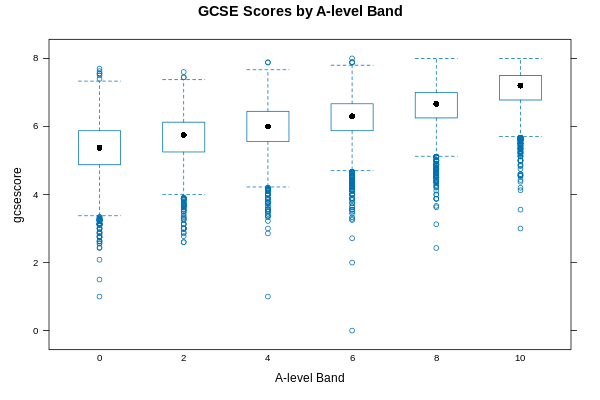

In [12]:
%%R -w 600 -h 400
bwplot(gcsescore ~ factor(score), data = Chem97,
       main = "GCSE Scores by A-level Band",
       xlab = "A-level Band")

## Conditioning and Grouping in `lattice`

Conditioning splits the plot into panels using `| condition` in the formula, great for multivariate comparisons. Grouping overlays lines or points within panels.



### Conditioned Density Plots with `densityplot()`

Kernel density estimates, conditioned by a factor:

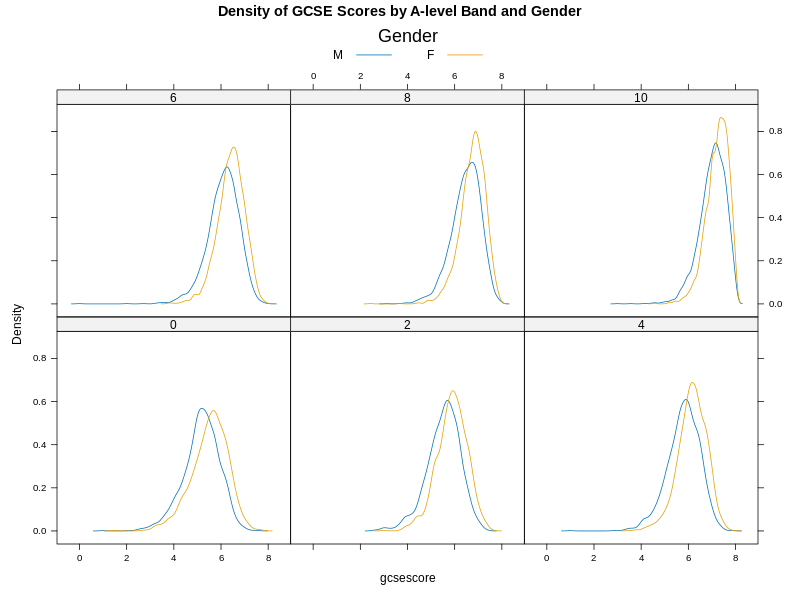

In [15]:
%%R -w 800 -h 600
densityplot(~ gcsescore | factor(score), data = Chem97,
            groups = gender,
            plot.points = FALSE,  # Omit raw points for clarity
            auto.key = list(title = "Gender", columns = 2),
            main = "Density of GCSE Scores by A-level Band and Gender")

This creates a multi-panel plot (one per A-level band) with overlaid densities for males and females.

### Conditioned Q-Q Plots with `qqmath()`

Check normality, grouped and conditioned:

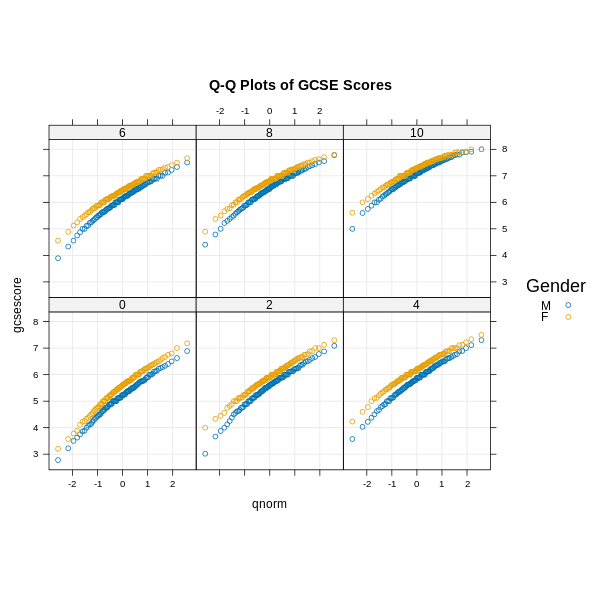

In [17]:
%%R -w 600 -h 600
qqmath(~ gcsescore | factor(score), data = Chem97,
       groups = gender,
       f.value = ppoints(100),  # Theoretical quantiles
       auto.key = list(title = "Gender"),
       type = c("p", "g"),  # Points and grid lines
       aspect = "xy",  # Equal aspect ratio
       main = "Q-Q Plots of GCSE Scores")

### Two-Sample Q-Q Plots with `qq()`

Compare two groups:

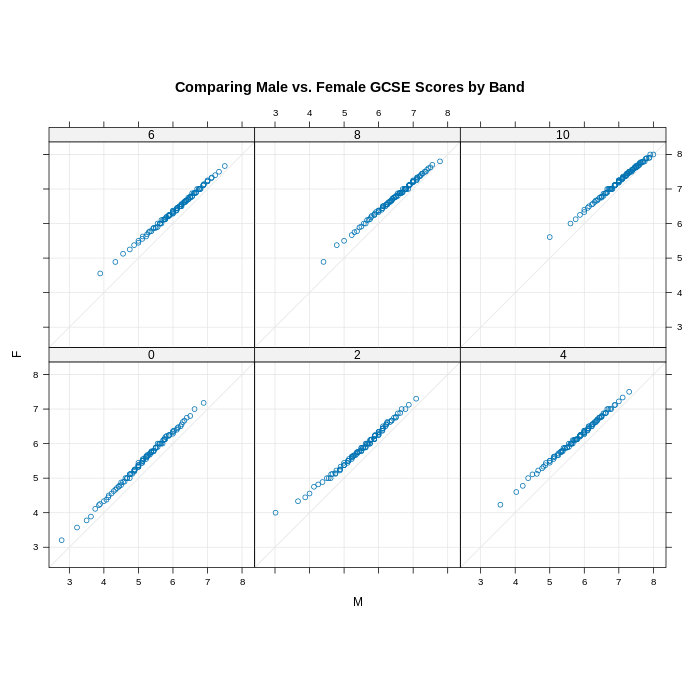

In [18]:
%%R -w 700 -h 700
qq(gender ~ gcsescore | factor(score), data = Chem97,
   f.value = ppoints(100),
   type = c("p", "g"),
   aspect = 1,
   main = "Comparing Male vs. Female GCSE Scores by Band")

### Strip Plots with `stripplot()`

For jittered 1D scatters (like a conditioned stripchart):

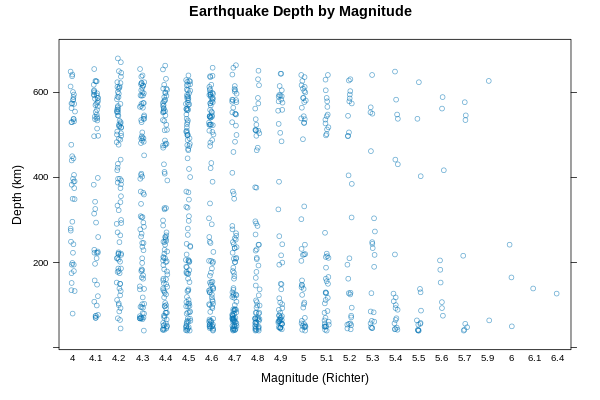

In [19]:
%%R -w 600 -h 400
stripplot(depth ~ factor(mag), data = quakes,
          jitter.data = TRUE,
          alpha = 0.6,  # Transparency
          main = "Earthquake Depth by Magnitude",
          xlab = "Magnitude (Richter)", ylab = "Depth (km)")

## Advanced Visualizations with `latticeExtra`

`latticeExtra` adds utilities for layering, scaling, and specialized plots. It integrates seamlessly with `lattice` objects.histogram.




### Empirical CDF Plots with `ecdfplot()`

Non-parametric cumulative distributions:

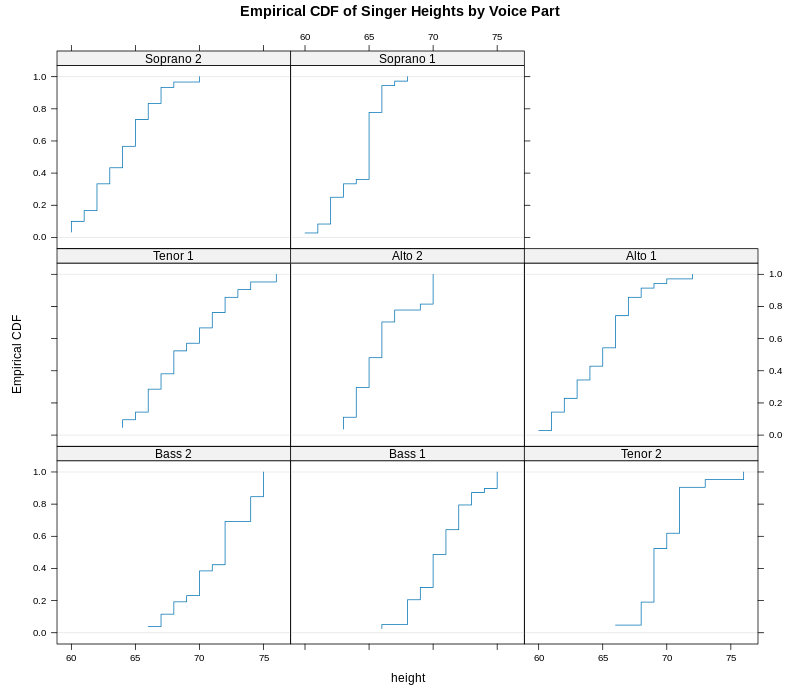

In [20]:
%%R -w 800 -h 700
ecdfplot(~ height | voice.part, data = singer,
         main = "Empirical CDF of Singer Heights by Voice Part")


Using the `singer` dataset, this conditions on voice parts (e.g., Tenor, Bass).

### Layered Plots with `layer()`

Add custom layers to existing plots, like smoothers:
▶

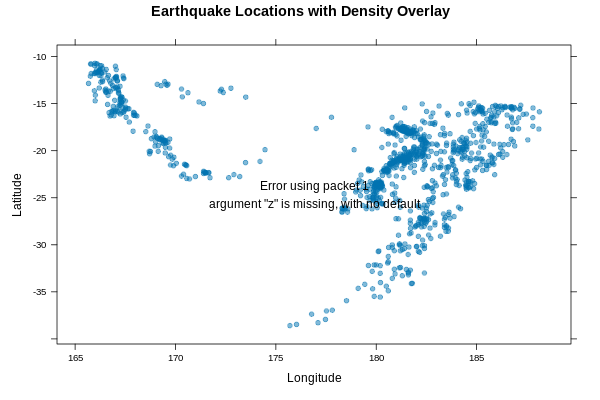

In [21]:
%%R -w 600 -h 400
p <- xyplot(lat ~ long, data = quakes,
            main = "Earthquake Locations with Density Overlay",
            xlab = "Longitude", ylab = "Latitude",
            alpha = 0.5, pch = 19)
p + layer(panel.2dsmoother(...), style = 1)

For quantile regression:


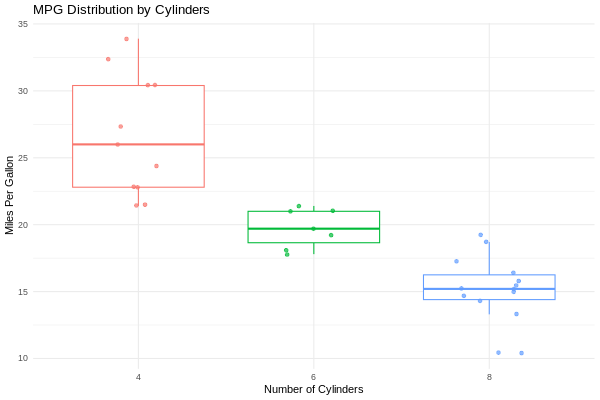

In [ ]:
%%R -w 600 -h 400
# Box plot with individual points
ggplot(data = mtcars, aes(x = factor(cyl), y = mpg, color = factor(cyl))) +
  geom_boxplot(outlier.shape = NA) + # Hide default outliers
  geom_jitter(width = 0.2, alpha = 0.7) + # Add jittered points
  labs(title = "MPG Distribution by Cylinders",
       x = "Number of Cylinders",
       y = "Miles Per Gallon") +
  theme_minimal() +
  guides(color = "none") # Remove the redundant color legend

For quantile regression:


Attaching package: ‘SparseM’



    det




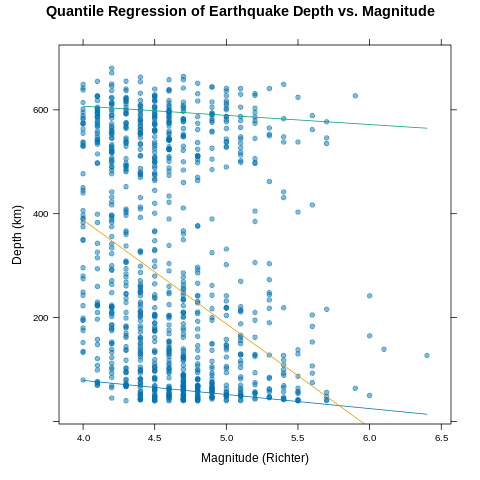

In [22]:
%%R
library(quantreg)  # Required for quantile regression
data(quakes)      # Load quakes dataset
xyplot(depth ~ mag, data = quakes,
       main = "Quantile Regression of Earthquake Depth vs. Magnitude",
       xlab = "Magnitude (Richter)", ylab = "Depth (km)",
       alpha = 0.5, pch = 19) +
  layer(panel.quantile(x, y, tau = c(0.5, 0.9, 0.1), superpose = TRUE)) +
  layer(auto.key = list(text = c("50%", "90%", "10%"), points = FALSE, lines = TRUE))

### Dual Y-Axis Plots with `doubleYScale()`

Plot two series with different scales:




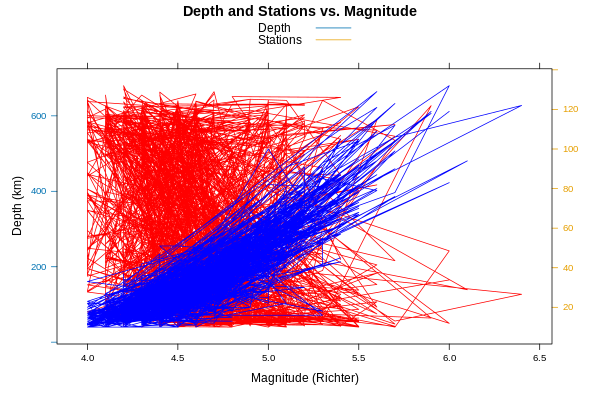

In [23]:
%%R -w 600 -h 400
# Create two xyplot objects
p1 <- xyplot(depth ~ mag, data = quakes, type = "l", col = "red",
             main = "Depth and Stations vs. Magnitude",
             xlab = "Magnitude (Richter)", ylab = "Depth (km)")
p2 <- xyplot(stations ~ mag, data = quakes, type = "l", col = "blue",
             xlab = "Magnitude (Richter)", ylab = "Stations")

# Combine with doubleYScale
doubleYScale(p1, p2, use.style = TRUE,
             auto.key = list(text = c("Depth", "Stations"), lines = TRUE, points = FALSE))

### Heatmaps with Smoothing

Combine `levelplot()` from `lattice` with `latticeExtra` panels for smoothed heatmaps. For three numeric variables (x, y, z), plot points and add a 2D smoother:

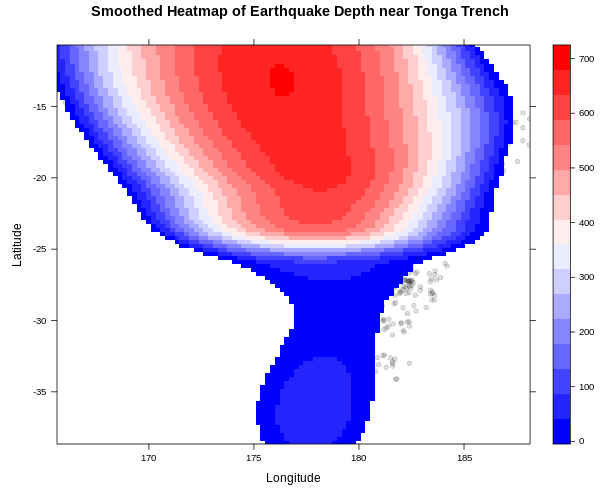

In [24]:
%%R -w 600 -h 500
# Assuming data with x, y, z columns
levelplot(depth ~ long * lat, data = quakes,
          main = "Smoothed Heatmap of Earthquake Depth near Tonga Trench",
          xlab = "Longitude", ylab = "Latitude",
          col.regions = colorRampPalette(c("blue", "white", "red"))(100),
          panel = function(...) {
            panel.levelplot.points(..., pch = 19, alpha = 0.5)  # Add points
            panel.2dsmoother(...)  # Add smoothed surface
          })

This visualizes individual points alongside a smoothed surface, blending scatter and heatmap elements.

### Merging Plots with `c.trellis()`

Combine multiple Trellis objects:

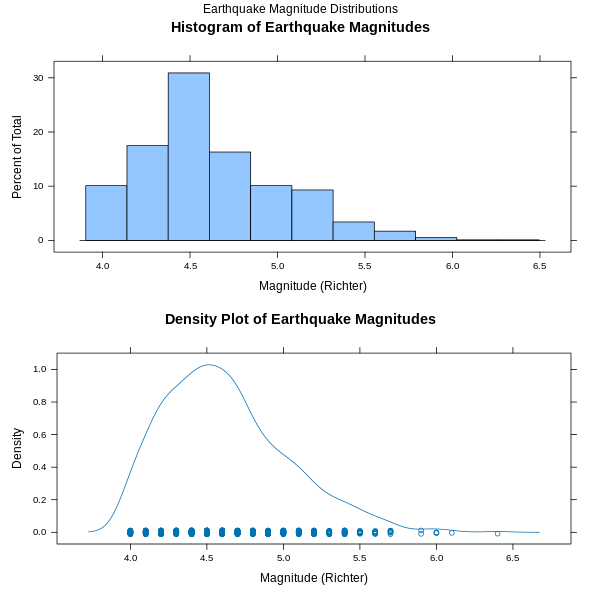

In [26]:
%%R -w 600 -h 600
library(gridExtra)
# Create histogram and density plot
p1 <- histogram(~ mag, data = quakes,
                main = "Histogram of Earthquake Magnitudes",
                xlab = "Magnitude (Richter)")
p2 <- densityplot(~ mag, data = quakes,
                 main = "Density Plot of Earthquake Magnitudes",
                 xlab = "Magnitude (Richter)")

# Combine plots using grid.arrange
grid.arrange(p1, p2, nrow = 2, top = "Earthquake Magnitude Distributions")

##   Customization and Themes

Customize appearance with themes from `latticeExtra`:

```r
# Apply a ggplot2-like theme
trellis.par.set(ggplot2like())
# Or Economist style
trellis.par.set(theEconomist.theme())
```



For panel-specific tweaks, use `panel` functions like `panel.ablineq()` to add labeled lines.

## Best Practices and Tips

- **Data Prep**: Use data frames; convert matrices with `as.data.frame.table()`.
- **Conditioning**: Limit to 2-3 conditioning variables to avoid cluttered panels (use `layout` to control arrangement, e.g., `layout = c(2, 3)`).
- **Performance**: For large datasets, subsample or use `alpha` for transparency.
- **Exploration**: Start simple, then add conditioning/grouping. Use `print()` explicitly if needed in scripts.
- **Resources**: Refer to `?xyplot` for details, or Deepayan Sarkar's book *Lattice: Multivariate Data Visualization with R*.


## Summary and Conclusions

This tutorial demonstrated the `lattice` and `latticeExtra` packages in R using the `quakes` dataset (1000 seismic events near the Tonga Trench). Key visualizations included scatter plots, histograms, density plots, box plots, quantile regression, dual y-axis plots, smoothed heatmaps, and combined plots using `grid.arrange()` from `gridExtra`. The examples showcased conditioning, grouping, and customization for multivariate analysis, with fixes for errors like `c.trellis()` and variable referencing.


`lattice` excels in creating clear, multivariate Trellis graphics, surpassing base R for complex datasets like `quakes`. `latticeExtra` enhances it with advanced features like quantile regression and smoothed surfaces. While powerful, it requires learning the formula interface and may need subsampling for large datasets. It complements `ggplot2` and `plotly` for static, high-quality visualizations.


## Resources

- **CRAN Documentation**: `lattice` reference manual and vignettes. [CRAN](https://cran.r-project.org/package=lattice)
- **Book**: "Lattice: Multivariate Data Visualization with R" by Deepayan Sarkar (Springer).
- **Vignettes/Tutorials**:
  - "Getting Started with Lattice Graphics" vignette. [Vignette](https://cran.r-project.org/package=lattice)
  - DataCamp’s Lattice Graphs guide. [DataCamp](https://www.datacamp.com)
  - DataFlair’s R Lattice overview. [DataFlair](https://www.dataflair.training)
- **Additional**: Lattice lab by Sarkar (PDF) and Packt’s "Mastering RStudio" chapter.
